# Assignment 4

* Download the "Assignment4_2020FallA.ipynb" notebook 
* Fill in the code in the cells marked with `# YOUR ANSWER HERE:` by answering the question/task defined in the cell above it 
* Code cells outside of `# YOUR ANSWER HERE:` will not be considered for grading. 
  * Feel free to write outside of it for debugging
* Please rename it as "Assignment4_2020FallA_firstname_lastname.ipynb"    
* Submit the updated notebook
  * Make sure to save your changes before submitting it! 

## Part A

1. Please load the digits dataset from sklearn


2. Please use PCA or TSNE to reduce its dimension down to 2
    - Set random_state = 2020
    - Set figsize = (15,10)


3. Generate a plot to visualize the dimension-reduced dataset.
    - Instead of using dots, using the number itself in the plot.
    - Use different colors for different digits - 0,1,2,3,4,5,6,7,8,9
   



(<Figure size 1080x720 with 1 Axes>,
 [Text(-0.82763934, 60.177914, '0'),
  Text(-20.321974, -22.74385, '1'),
  Text(2.6109693, -57.879597, '2'),
  Text(33.605865, -26.506756, '3'),
  Text(-55.848248, -5.078835, '4'),
  Text(3.8343778, 14.240513, '5'),
  Text(-35.045834, 32.357983, '6'),
  Text(40.575832, 30.384598, '7'),
  Text(0.4873258, -20.171202, '8'),
  Text(27.060814, -2.6454933, '9')])

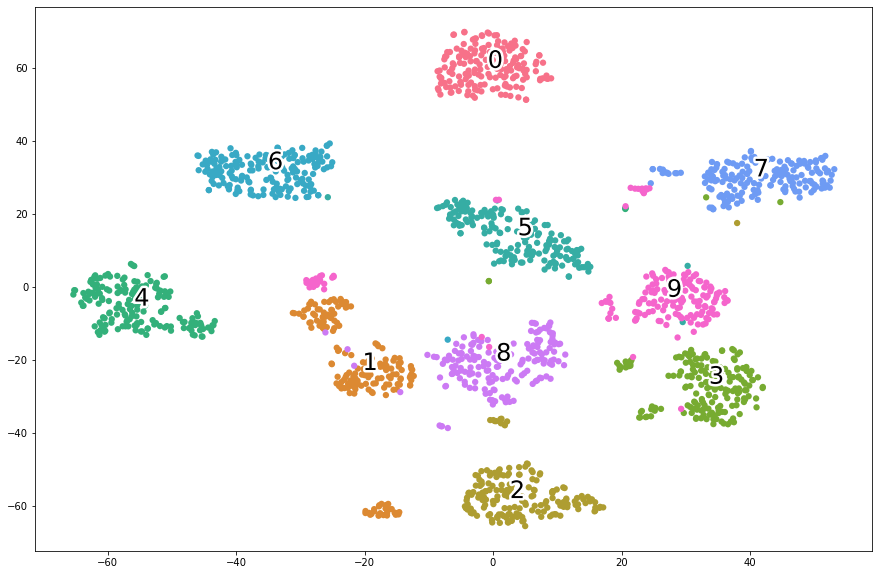

In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as se

digits = load_digits()
digits.data.shape

x = np.vstack([digits.data[digits.target==t]
               for t in range(10)])
y = np.hstack([digits.target[digits.target==t]
               for t in range(10)])
projection = TSNE(random_state=2020, n_components=2).fit_transform(x)

def graph(x, color):
    # Choosing a color palette with seaborn.
    palette = np.array(se.color_palette("husl", 10))

    # Creating a scatter plot.
    fig = plt.figure(figsize=(15, 10))
    asp = plt.subplot(aspect='equal')
    plot = asp.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[color.astype(np.int)])
    asp.axis('tight')

    # Adding digits for each scattered output.
    numbers = []
    for c in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[color == c, :], axis=0)
        txt = asp.text(xtext, ytext, str(c), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        numbers.append(txt)

    return fig, asp, plot, numbers

graph(projection, y)

## Part B

The attached csv file, "KCLT.csv" contains a year's worth of temperature data as measured by a weather station at the Charlotte/Douglas International Airport.

Complete the following tasks:

1. Import the csv file into a pandas dataframe--please follow the best practices for reading csv files in using pandas (as discussed in class).


2. Write a function that can take as input a pandas Series object that is assumed to be ordered chronologically (like any of the temperature columns in the KCLT data) and return a N-period weighted moving average calculated from the given pandas Series: 
    - where **N is an argument to your function** (that is, the function should be able to calculate a 4-period weighted moving average or a 10-period weighted moving average, etc.). 
    - Please note that, in addition to N, your function should take as an argument **the weights that should be applied to the moving average calculation**.


3. Using your choice of the plotting libraries we discussed in class (Matplotlib or Seaborn), create 2 separate GRAPHS (plots). 


4. The first plot should show two time series of data--**the average precipitation** and **the record precipitation** (a total of 365 daily points for each series)--each of the plotted lines for those two columns should use a different color and be properly labeled in a legend


5. The second plot should have 3 times series plotted on it:
    - the record min temperature
    - the 7-day weighted moving average of the actual mean temperature with any weights of your choice; and
    - the record max temperature
    

6. Both graphs must have proper axes titles, labels, colored lines, etc. Try to follow Edward Tufte's rules as much as you can.

Finally, include a short markdown paragraph discussing any important insights you derived from this visual analysis.

NOTE: The assignment file is a CSV file--please be careful to ensure that your submitted solution works with the ORIGINAL csv file--this is how your assignment will be graded. 

In [2]:
# YOUR ANSWER HERE:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Reading the data
weather = pd.read_csv("KCLT.csv", header=0)

# Defining a function for Weighted Moving Average for actual maximum temperature
def WeightedMovingAverage(N, W):
    sum(W)==1
    weather['Weighted Moving Average'] = weather['actual_max_temp'].rolling(window = N).mean()
    return weather['Weighted Moving Average']

WeightedMovingAverage(7,[0.05,0.05,0.10,0.10,0.20,0.20,0.30])
print ("Weighted Moving Average for the Actual Maximum Temperature are as follows")
weather.head(20)

Weighted Moving Average for the Actual Maximum Temperature are as follows


,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,Weighted Moving Average
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91,NaN
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53,NaN
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50,NaN
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63,NaN
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65,NaN
5,2014-7-6,74,61,87,68,89,57,99,1964,1948,0.00,0.10,1.95,NaN
6,2014-7-7,79,67,91,68,89,55,100,1972,1954,0.00,0.11,2.37,89.571429
7,2014-7-8,83,72,94,68,89,58,101,1892,2010,0.00,0.11,1.87,90.000000
8,2014-7-9,80,71,89,68,89,57,101,1891,1986,0.15,0.12,3.71,89.142857
9,2014-7-10,78,71,85,68,89,53,101,1961,1926,0.00,0.11,2.45,88.000000


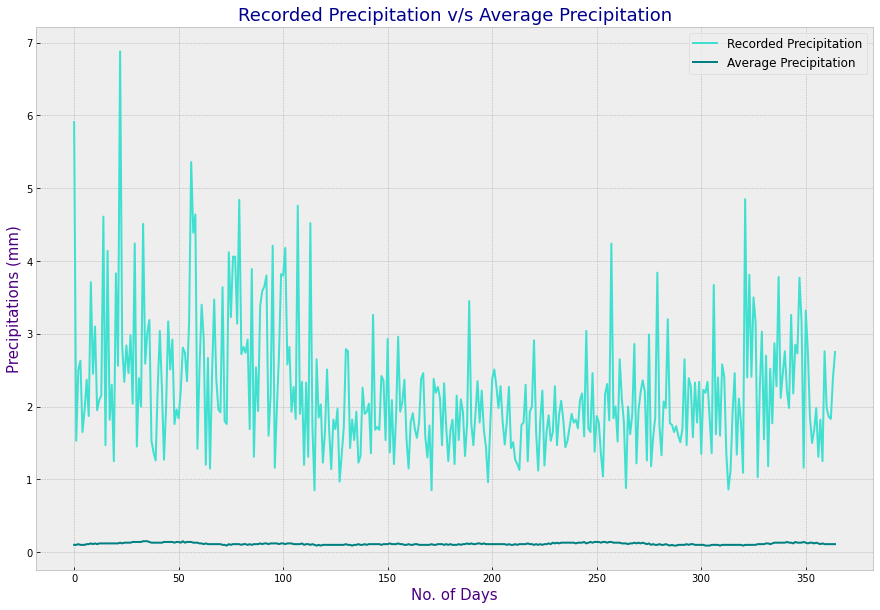

In [3]:
#Figure to depict the recorded and average precipitations

plt.figure(figsize=(15,10))
plt.style.use('bmh')
plt.plot(weather['record_precipitation'],label='Recorded Precipitation', color='turquoise')
plt.plot(weather['average_precipitation'],label='Average Precipitation', color='teal')
plt.xlabel('No. of Days',fontsize = 15,color='indigo')
plt.ylabel('Precipitations (mm)',fontsize = 15,color='indigo')
plt.title('Recorded Precipitation v/s Average Precipitation',fontsize = 18,color='darkblue')
plt.legend(loc='best', fontsize='large')
plt.show()

#### Observations:
According to the above graph, we can see that the recorded precipitation has a greater flunctuations in the first 120 days ranging from 0.9 mm and 6.9 mm. In contrast to the Actual precipitation which is between 0 mm and 2.7 mm. This in turn means that there was heavy rainfall or snow during the first 4 months.
However, if we consider the average precipitation, its pretty much a flat line having 0.2mm of precipitation over 365 days with a slight rise around the 40th day.

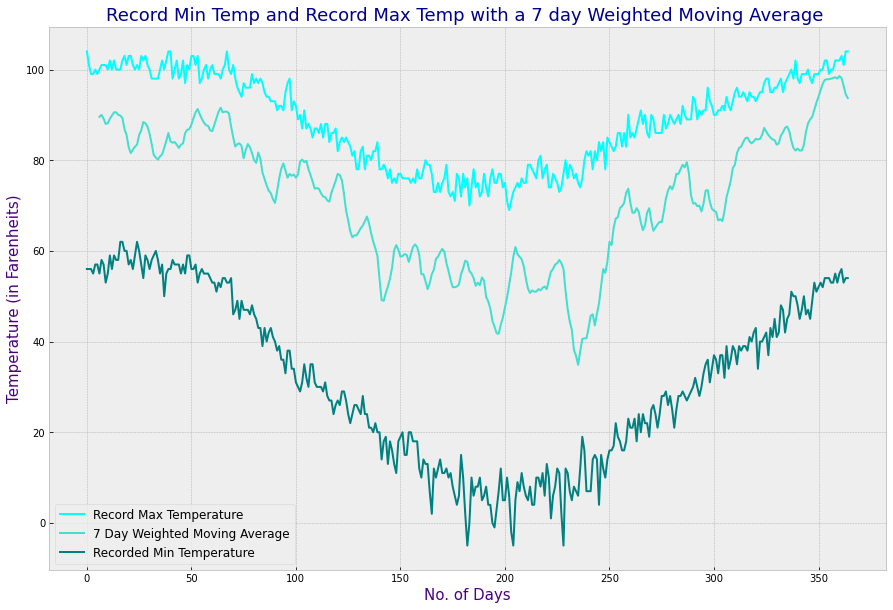

In [5]:
#Figure to depict the recorded maximum temperature, 7-Day Weighted Moving Average and the recorded minimum temperature

plt.figure(figsize=(15,10))
plt.style.use('bmh')
plt.plot(weather['record_max_temp'],label='Record Max Temperature', color='aqua')
plt.plot(weather['Weighted Moving Average'],label='7 Day Weighted Moving Average', color='turquoise')
plt.plot(weather['record_min_temp'],label='Recorded Min Temperature', color='teal')
plt.xlabel('No. of Days',fontsize = 15,color='indigo')
plt.ylabel('Temperature (in Farenheits)',fontsize = 15,color='indigo')
plt.title('Record Min Temp and Record Max Temp with a 7 day Weighted Moving Average ',fontsize = 18,color='darkblue')
plt.legend(loc='best', fontsize='large')
plt.show()

#### Observations:
With just an initial look at the graph, we can see that there is a uniform pattern between all the three parameters. The temperature has a downward trend between 100 to 300 days. Specifically speaking, each of the parameter has a drop in temperature starting from the 60th day which then leads to the lowest temperature of 70° and -2°F for max temperature and min temperature respectively. This leads to a 38°F temperature for the 7-day weighted moving average.
We can also see that the moving average and the max temperature are almost at par at the 350th day of that year.
Laslty, an upward trend is notice after the 250th day which keeps on rising until the end of the year.